In [51]:
import pathlib
import re

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from plotnine import *

plt.style.use('seaborn-whitegrid')    # 使用样式
plt.rcParams['font.sans-serif'] = ['SimHei']     # 显示中文
plt.rcParams['axes.unicode_minus'] = False     # 显示负号


path_record = pathlib.Path('./my_douban_data/豆瓣读书记录_2023.md')

## 数据准备

In [52]:
year = int(re.search(r"\d{4}", path_record.stem).group(0))  # 从文件名获取年份信息

with open(path_record, encoding='utf-8') as f:
    content = f.read()

In [53]:
names = re.findall(r'### \[(.*?)\]\(', content)
links = re.findall(r'### .*?\((.*?)\)', content)
stars = [len(i) for i in re.findall(r'<font color.*?>(.*?)</font>', content)]

In [54]:
line1 = re.findall(r'\n> (.*?)\n>', content)
line2 = re.findall(r'\n> .*?\n> (.*?)\n', content)

# writers = [i.split(' / ')[0] for i in line1]
# publishers = [i.split(' / ')[1] for i in line1]
# publish_times = [i.split(' / ')[2] for i in line1]
# prices = [i.split(' / ')[3].replace('元', '') for i in line1]

read_dates = [i.split(' ')[0] for i in line2]
# labels = [re.search(r'标签: (.*)', i).group(1).split() for i in line2]
labels = ['' for i in line2]

In [55]:

df = pd.DataFrame({'书名': names, '评分': stars, '读完时间': read_dates, '标签': labels, '备注': line1, '豆瓣链接': links})
df['读完时间'] = pd.to_datetime(df['读完时间'])
df['月份'] = df['读完时间'].dt.month.astype(str) + '月'
df['月份'] = pd.Categorical(df['月份'], categories=['1月', '2月', '3月', '4月', '5月', '6月', '7月', '8月', '9月', '10月', '11月', '12月'])
df = df.sort_values('读完时间')
df['累计数量'] = 1
df['累计数量'] = df['累计数量'].cumsum()
df['书名'] = df['书名'].str.replace(': 日本小學館獨家授權香港中文版', '')
df

,书名,评分,读完时间,标签,备注,豆瓣链接,月份,累计数量
49,亂馬1/2（卷三十）,3,2023-01-02,,高橋留美子 / 文化传信有限公司 / HK$25,https://book.douban.com/subject/3990430/,1月,1
48,单读·十周年特辑,4,2023-01-08,,吴琦 主编、吕晓宇 / 中信出版集团 / 2019-12-1 / 99.00元,https://book.douban.com/subject/34842466/,1月,2
47,亂馬1/2（卷三十一）,4,2023-01-20,,高橋留美子 / 文化传信有限公司 / HK$25,https://book.douban.com/subject/3990437/,1月,3
46,亂馬1/2（卷三十二）,3,2023-01-24,,高橋留美子 / 文化传信有限公司 / HK$28,https://book.douban.com/subject/3990446/,1月,4
45,悉达多: 一首印度的诗,3,2023-01-27,,[德] 赫尔曼·黑塞 / 姜乙 / 天津人民出版社 / 2017-1 / 32.00元,https://book.douban.com/subject/26980487/,1月,5
44,亂馬1/2（卷三十三）,4,2023-02-07,,高橋留美子 / 文化传信有限公司 / HK$28,https://book.douban.com/subject/3990469/,2月,6
43,亂馬1/2（卷三十四）,3,2023-02-11,,高橋留美子 / 文化传信有限公司 / HK$28,https://book.douban.com/subject/3990475/,2月,7
42,亂馬1/2（卷三十五）,3,2023-02-16,,高橋留美子 / 文化传信有限公司 / HK$28,https://book.douban.com/subject/3990480/,2月,8
41,亂馬1/2（卷三十六）,4,2023-02-20,,高橋留美子 / 文化传信有限公司 / HK$28,https://book.douban.com/subject/3990487/,2月,9
40,亂馬1/2（卷三十七）,4,2023-02-25,,高橋留美子 / 文化传信有限公司 / HK$28,https://book.douban.com/subject/3990491/,2月,10


In [56]:
df.columns

Index(['书名', '评分', '读完时间', '标签', '备注', '豆瓣链接', '月份', '累计数量'], dtype='object')

In [57]:
df['作者'] = df['备注'].map(lambda x: x.split(' / ')[0])
df['评分'] = df['评分'].map(lambda x: '★' * x)
df1 = df[['书名', '作者', '评分', '读完时间']]
df1

,书名,作者,评分,读完时间
49,亂馬1/2（卷三十）,高橋留美子,★★★,2023-01-02
48,单读·十周年特辑,吴琦 主编、吕晓宇,★★★★,2023-01-08
47,亂馬1/2（卷三十一）,高橋留美子,★★★★,2023-01-20
46,亂馬1/2（卷三十二）,高橋留美子,★★★,2023-01-24
45,悉达多: 一首印度的诗,[德] 赫尔曼·黑塞,★★★,2023-01-27
44,亂馬1/2（卷三十三）,高橋留美子,★★★★,2023-02-07
43,亂馬1/2（卷三十四）,高橋留美子,★★★,2023-02-11
42,亂馬1/2（卷三十五）,高橋留美子,★★★,2023-02-16
41,亂馬1/2（卷三十六）,高橋留美子,★★★★,2023-02-20
40,亂馬1/2（卷三十七）,高橋留美子,★★★★,2023-02-25


In [58]:
with pd.ExcelWriter(f"{year}年读书小结.xlsx") as xlsx:
    df.to_excel(xlsx,sheet_name="小结1", index=False)
    df1.to_excel(xlsx,sheet_name="小结2", index=False)


## 可视化

In [73]:
df = pd.read_excel(f"{year}年读书小结.xlsx")
df

,书名,评分,读完时间,标签,备注,豆瓣链接,月份,累计数量,作者
0,亂馬1/2（卷三十）,★★★,2023-01-02,NaN,高橋留美子 / 文化传信有限公司 / HK$25,https://book.douban.com/subject/3990430/,1月,1,高橋留美子
1,单读·十周年特辑,★★★★,2023-01-08,NaN,吴琦 主编、吕晓宇 / 中信出版集团 / 2019-12-1 / 99.00元,https://book.douban.com/subject/34842466/,1月,2,吴琦 主编、吕晓宇
2,亂馬1/2（卷三十一）,★★★★,2023-01-20,NaN,高橋留美子 / 文化传信有限公司 / HK$25,https://book.douban.com/subject/3990437/,1月,3,高橋留美子
3,亂馬1/2（卷三十二）,★★★,2023-01-24,NaN,高橋留美子 / 文化传信有限公司 / HK$28,https://book.douban.com/subject/3990446/,1月,4,高橋留美子
4,悉达多: 一首印度的诗,★★★,2023-01-27,NaN,[德] 赫尔曼·黑塞 / 姜乙 / 天津人民出版社 / 2017-1 / 32.00元,https://book.douban.com/subject/26980487/,1月,5,[德] 赫尔曼·黑塞
5,亂馬1/2（卷三十三）,★★★★,2023-02-07,NaN,高橋留美子 / 文化传信有限公司 / HK$28,https://book.douban.com/subject/3990469/,2月,6,高橋留美子
6,亂馬1/2（卷三十四）,★★★,2023-02-11,NaN,高橋留美子 / 文化传信有限公司 / HK$28,https://book.douban.com/subject/3990475/,2月,7,高橋留美子
7,亂馬1/2（卷三十五）,★★★,2023-02-16,NaN,高橋留美子 / 文化传信有限公司 / HK$28,https://book.douban.com/subject/3990480/,2月,8,高橋留美子
8,亂馬1/2（卷三十六）,★★★★,2023-02-20,NaN,高橋留美子 / 文化传信有限公司 / HK$28,https://book.douban.com/subject/3990487/,2月,9,高橋留美子
9,亂馬1/2（卷三十七）,★★★★,2023-02-25,NaN,高橋留美子 / 文化传信有限公司 / HK$28,https://book.douban.com/subject/3990491/,2月,10,高橋留美子


In [74]:
df['月份'] = pd.Categorical(df['月份'], categories=[f'{i}月' for i in range(1, 13)])

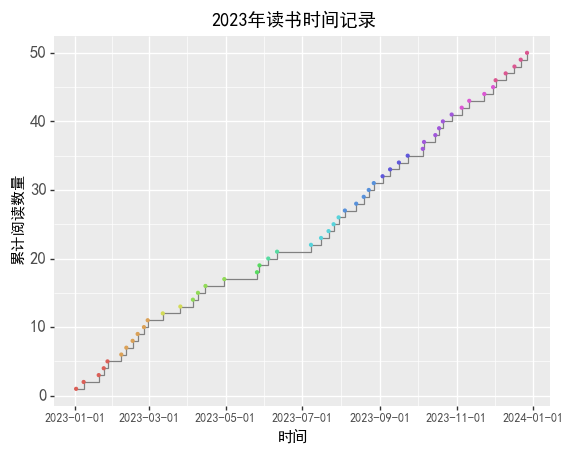

<ggplot: (107683134392)>

In [75]:
(ggplot(df, aes(x='读完时间', y='累计数量'))
    # + geom_line()
    + geom_step(color='grey')
    + geom_point(aes(color='月份'), size=.7)
    + labs(x='时间', y='累计阅读数量', title=f'{year}年读书时间记录')
    + guides(color=False)
    + theme(text=element_text(family="SimHei"),
            # axis_text_x=element_text(size=12),
            axis_text_y=element_text(size=12),
            )
)

In [76]:
sns.color_palette("Set3", 12).as_hex()

['#8dd3c7',
 '#ffffb3',
 '#bebada',
 '#fb8072',
 '#80b1d3',
 '#fdb462',
 '#b3de69',
 '#fccde5',
 '#d9d9d9',
 '#bc80bd',
 '#ccebc5',
 '#ffed6f']

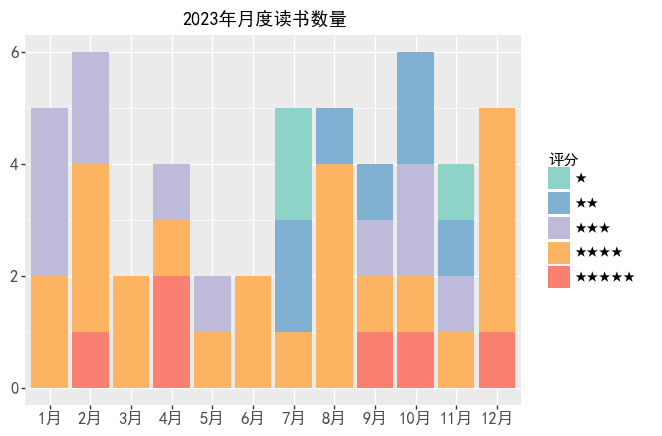

<ggplot: (107682977600)>

In [77]:
# colors = sns.color_palette("Reds").as_hex()
colors = [sns.color_palette("Set3", 12).as_hex()[i] for i in [0, 4, 2, 5, 3]]

(ggplot(df, aes(x='月份'))
    # + geom_bar(fill='lightblue')
    + geom_bar(aes(fill='factor(评分)', group='factor(评分)'))
    + scale_fill_manual(values=colors)
    + labs(x='', y='', title=f'{year}年月度读书数量', fill='评分')
    + theme(text=element_text(family="SimHei"),
            axis_text_x=element_text(size=12),
            axis_text_y=element_text(size=12),
            )
)


In [78]:
df_score = df.groupby('评分', as_index=False).count()[['评分', '书名']]
df_score['评分'] = df_score['评分'].map(len).astype(str) + '分'
df_score['评分'] = pd.Categorical(df_score['评分'], categories=reversed(['1分', '2分', '3分', '4分', '5分']))
df_score['x'] = 1
df_score

,评分,书名,x
0,1分,3,1
1,2分,7,1
2,3分,11,1
3,4分,23,1
4,5分,6,1


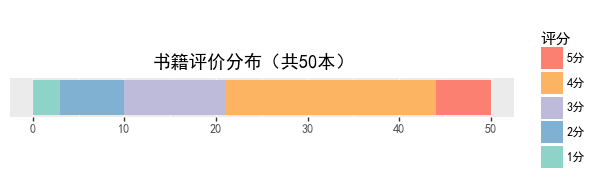

<ggplot: (107682292682)>

In [79]:
# colors_r = sns.color_palette("Reds_r").as_hex()
colors_r = list(reversed(colors))

(ggplot(df_score)
    + geom_col(aes(x='x', y='书名', fill='评分'))
    # + geom_text(aes(label='书名'), )
    + scale_fill_manual(values=colors_r)
    + labs(x='', y='', title=f'书籍评价分布（共{df_score["书名"].sum()}本）')
    + scale_x_continuous(breaks=None)
    # + guides(fill = guide_legend(reverse=True))
    + theme(text=element_text(family="SimHei"),
            figure_size=(6.5, 0.5),
            # axis_ticks=element_blank(),
            )
    + coord_flip()
)

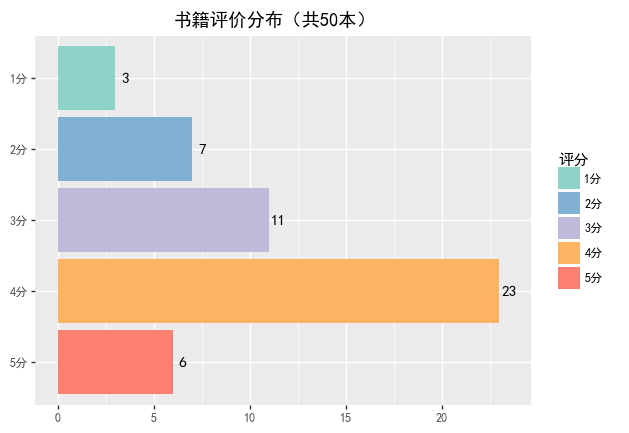

<ggplot: (107680762387)>

In [80]:
(ggplot(df_score, aes(x='评分', y='书名', fill='评分'))
    + geom_col()
    + geom_text(aes(label='书名', y='书名+.5'))
    + scale_fill_manual(values=colors_r)
    + labs(x='', y='', title=f'书籍评价分布（共{df_score["书名"].sum()}本）')
    # + scale_x_continuous(breaks=None)
    + guides(fill = guide_legend(reverse=True))
    + theme(text=element_text(family="SimHei"),
            # figure_size=(6.5, 0.5),
            # axis_ticks=element_blank(),
            )
    + coord_flip()
)

<AxesSubplot:ylabel='书名'>

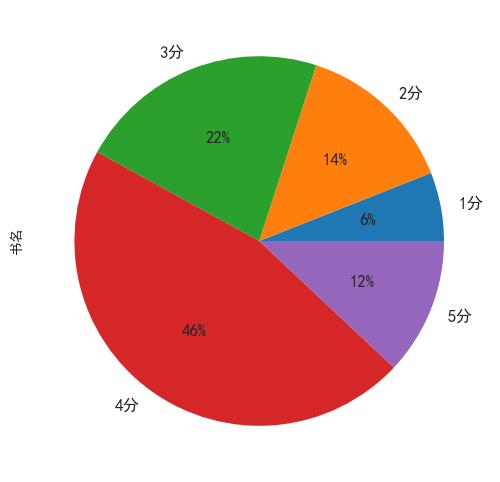

In [81]:
df_score.set_index('评分').plot.pie(y='书名', figsize=(6, 6), autopct='%1.0f%%', fontsize=12, legend=False)

In [82]:
df_output = pd.DataFrame({'短评': 25, '长评': 25}, index=[0]).melt()
df_output.columns=['评论', '数量']
df_output

,评论,数量
0,短评,25
1,长评,25


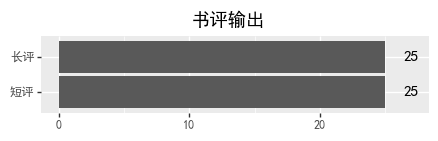

<ggplot: (107680653662)>

In [83]:
(ggplot(df_output, aes(x='评论', y='数量'))
    + geom_col()
    + geom_text(aes(label='数量', y='数量+2'))
    + labs(x='', y='', title=f'书评输出')
    + theme(text=element_text(family="SimHei"),
            figure_size=(5, 1),
            )
    + coord_flip()
)

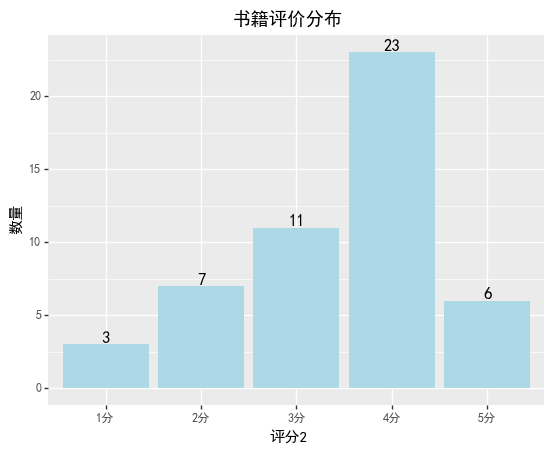

<ggplot: (107680651942)>

In [84]:
df_score['评分2'] = pd.Categorical(df_score['评分'], categories=['1分', '2分', '3分', '4分', '5分'])

(ggplot(df_score, aes(x='评分2', y='书名'))
    + geom_col(fill='lightblue')
    + geom_text(aes(label='书名'), size=12, va='bottom')
    + ggtitle('书籍评价分布')
    + ylab('数量')
    + theme(text=element_text(family="SimHei"))
)

In [85]:
df.query('评分==5')['书名']

Series([], Name: 书名, dtype: object)